🔍 Feature Sample:


,mean,std,max,min,entropy,hist_bin_0,hist_bin_1,hist_bin_2,hist_bin_3,hist_bin_4,...,hist_bin_8,hist_bin_9,hist_bin_10,hist_bin_11,hist_bin_12,hist_bin_13,hist_bin_14,hist_bin_15,label,image_path
0,9.540710,48.392727,255.0,0.0,-8.843721e-07,0.962585,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037415,1,modelA_camera_dataset\acoustic\leak\leak_000.png
1,2.319031,24.206919,255.0,0.0,-2.149616e-07,0.990906,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009094,1,modelA_camera_dataset\acoustic\leak\leak_001.png
2,2.319031,24.206919,255.0,0.0,-2.149616e-07,0.990906,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009094,1,modelA_camera_dataset\acoustic\leak\leak_002.png
3,17.571716,64.591195,255.0,0.0,-1.628803e-06,0.931091,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068909,1,modelA_camera_dataset\acoustic\leak\leak_003.png
4,1.260681,17.885312,255.0,0.0,-1.168583e-07,0.995056,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004944,1,modelA_camera_dataset\acoustic\leak\leak_004.png


📊 Feature Statistics:


,mean,std,max,min,entropy,hist_bin_0,hist_bin_1,hist_bin_2,hist_bin_3,hist_bin_4,...,hist_bin_7,hist_bin_8,hist_bin_9,hist_bin_10,hist_bin_11,hist_bin_12,hist_bin_13,hist_bin_14,hist_bin_15,label
count,90.000000,90.000000,90.000000,90.0,9.000000e+01,90.000000,90.000000,90.0,90.0,90.0,...,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.000000,90.000000
mean,10.710489,23.647877,142.000000,0.0,1.785926e+03,0.752880,0.233569,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013550,0.500000
std,5.147218,18.093603,113.633058,0.0,1.795949e+03,0.221677,0.234890,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019198,0.502801
min,1.260681,8.569750,29.000000,0.0,-1.628803e-06,0.526733,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,6.116638,8.663273,29.000000,0.0,-5.222556e-07,0.532623,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,14.426453,13.297061,142.000000,0.0,1.774536e+03,0.736023,0.229523,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002472,0.500000
75%,14.518539,37.456515,255.000000,0.0,3.571252e+03,0.976013,0.467377,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022095,1.000000
max,17.571716,64.591195,255.000000,0.0,3.595940e+03,0.995056,0.473267,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068909,1.000000


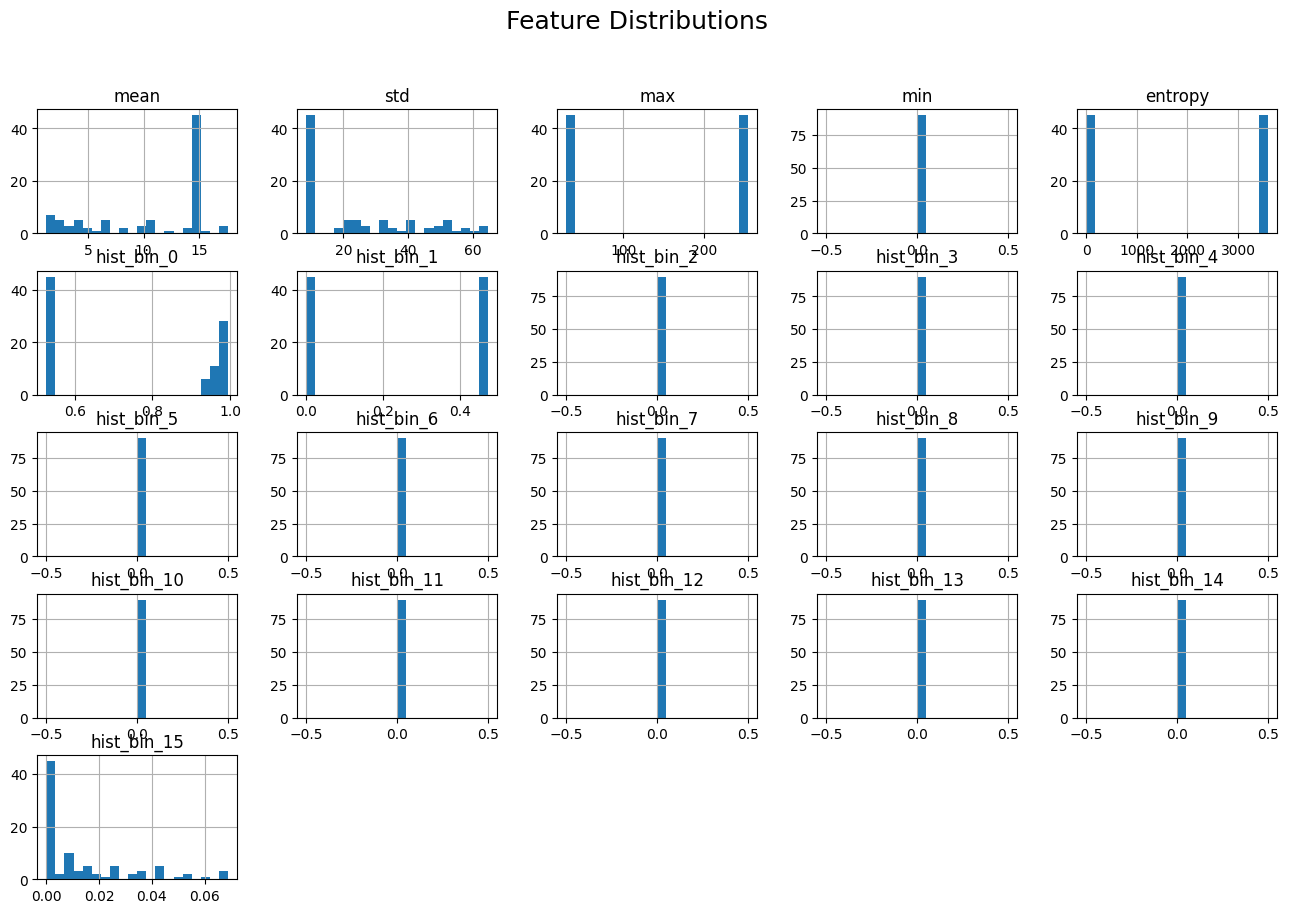

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.80      0.89        10

    accuracy                           0.89        18
   macro avg       0.90      0.90      0.89        18
weighted avg       0.91      0.89      0.89        18

Confusion Matrix:
 [[8 0]
 [2 8]]


c:\Users\e019897\Downloads\Lakki Project\small-pipeline\Small Pipeline\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:13:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [10]:

# Model A: Camera-Based Leak Detection (Image Feature + XGBoost)

import os
import cv2
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import joblib
import matplotlib.pyplot as plt

# Set base path to the unzipped dataset
base_path = Path("modelA_camera_dataset")  # replace with actual unzip path

# Feature extractor
def extract_features(image):
    # Resize and convert to grayscale
    image = cv2.resize(image, (128, 128))

    # Basic stats
    mean = np.mean(image)
    std = np.std(image)
    max_val = np.max(image)
    min_val = np.min(image)
    entropy = -np.sum((image/255.0) * np.log2(image/255.0 + 1e-9))

    # Histogram (16 bins)
    hist = cv2.calcHist([image], [0], None, [16], [0, 256]).flatten()
    hist /= np.sum(hist)  # normalize

    return np.array([mean, std, max_val, min_val, entropy, *hist])


# Define feature names
base_features = ["mean", "std", "max", "min", "entropy"]
hist_features = [f"hist_bin_{i}" for i in range(16)]
feature_names = base_features + hist_features

# Extract features from dataset
features = []
labels = []
image_paths = []

for cam_type in ["acoustic", "thermal", "3d"]:
    for label_str, label_val in zip(["leak", "noleak"], [1, 0]):
        folder = base_path / cam_type / label_str
        for filename in os.listdir(folder):
            file_path = folder / filename
            image = cv2.imread(str(file_path), cv2.IMREAD_GRAYSCALE)
            feats = extract_features(image)
            features.append(feats)
            labels.append(label_val)
            image_paths.append(str(file_path))

# Convert to DataFrame
df_features = pd.DataFrame(features, columns=feature_names)
df_features["label"] = labels
df_features["image_path"] = image_paths

# Show first few rows
print("🔍 Feature Sample:")
display(df_features.head())

# Show feature stats
print("📊 Feature Statistics:")
display(df_features.describe())

# Optional: Show feature distribution
df_features[feature_names].hist(figsize=(16, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=18)
plt.show()

# Convert to DataFrame
X = np.vstack(features)
y = np.array(labels)

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = XGBClassifier(n_estimators=100, max_depth=4, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



In [11]:
# Save model and scaler
joblib.dump(model, "modelA_xgb_image_model.pkl")
joblib.dump(scaler, "modelA_scaler.pkl")

print("✅ Model and scaler saved for Model A.")


✅ Model and scaler saved for Model A.


<Figure size 1000x600 with 0 Axes>

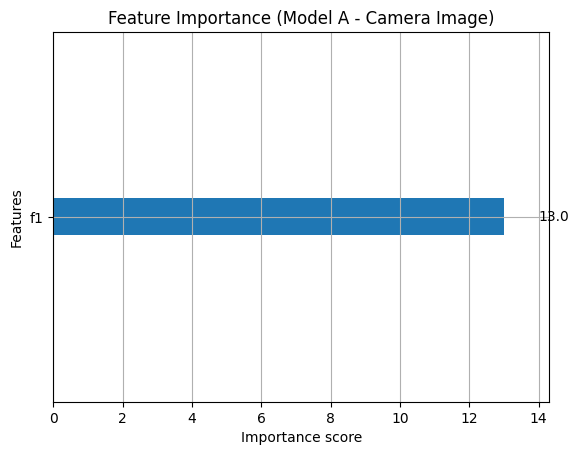

In [12]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
import joblib

# Load model
model = joblib.load("modelA_xgb_image_model.pkl")

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(model, max_num_features=15)
plt.title("Feature Importance (Model A - Camera Image)")
plt.show()


<Figure size 600x400 with 0 Axes>

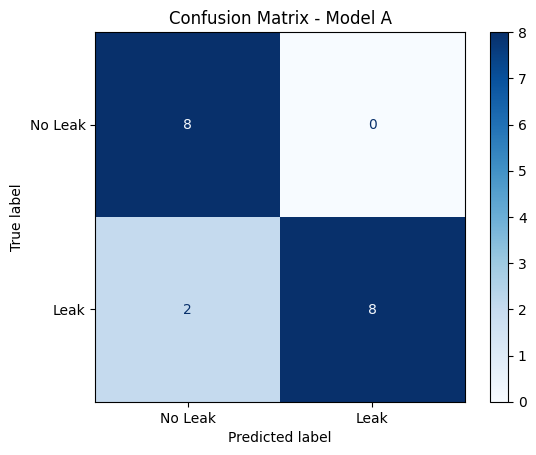

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already available
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Leak", "Leak"])

plt.figure(figsize=(6, 4))
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix - Model A")
plt.show()


Test & Predict from a New Image 

In [14]:
import cv2
import numpy as np
import joblib

# === Load Model and Scaler ===
model = joblib.load("modelA_xgb_image_model.pkl")
scaler = joblib.load("modelA_scaler.pkl")

# === Feature Extractor Function ===
def extract_features(image):
    image = cv2.resize(image, (128, 128))
    mean = np.mean(image)
    std = np.std(image)
    max_val = np.max(image)
    min_val = np.min(image)
    entropy = -np.sum((image / 255.0) * np.log2(image / 255.0 + 1e-9))
    hist = cv2.calcHist([image], [0], None, [16], [0, 256]).flatten()
    hist /= np.sum(hist)  # normalize histogram
    return np.array([mean, std, max_val, min_val, entropy, *hist])

# === Load Image to Test ===
image_path = "./modelA_camera_dataset/3d/noleak/noleak_000.png"  # replace with your test image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError(f"Image not found at path: {image_path}")

# === Extract Features and Predict ===
features = extract_features(image).reshape(1, -1)
features_scaled = scaler.transform(features)
prediction = model.predict(features_scaled)[0]
confidence = model.predict_proba(features_scaled)[0][prediction]

# === Print Prediction ===
label = "LEAK DETECTED" if prediction == 1 else "NO LEAK"
print(f"🔍 Prediction: {label}")
print(f"🧠 Confidence: {confidence:.2f}")


🔍 Prediction: NO LEAK
🧠 Confidence: 0.98
